In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
startup=pd.read_csv("C:/Users/Yogendra/Downloads/50_Startups.csv")

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

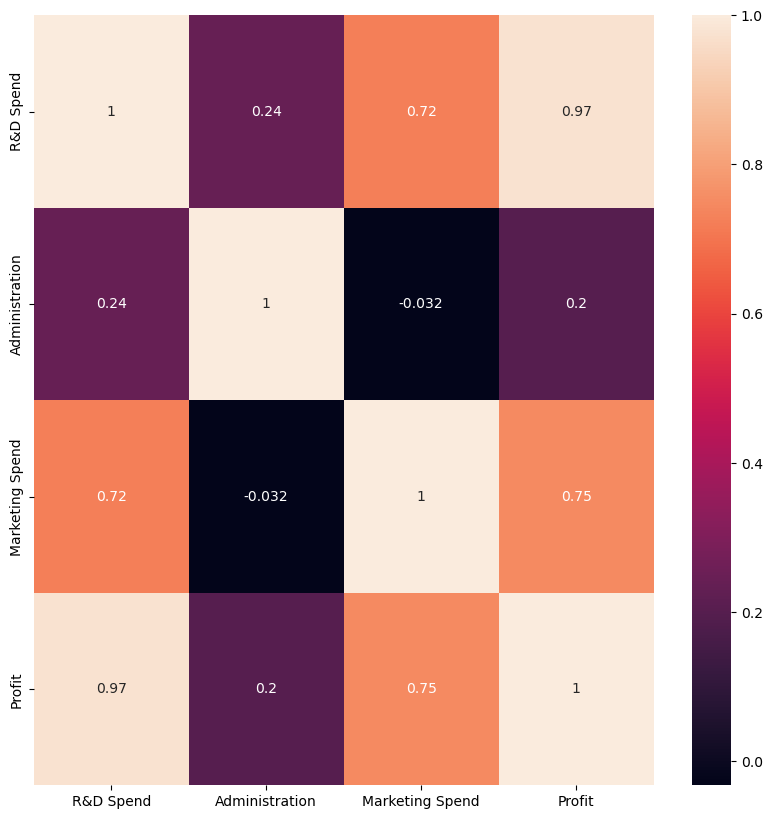

In [6]:
corr = startup.select_dtypes('number').corr()
top_corr_features = corr.index
plt.figure(figsize=(10,10))
g=sns.heatmap(startup[top_corr_features].corr(),annot=True)

In [15]:
startup.describe()

,RSpend,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


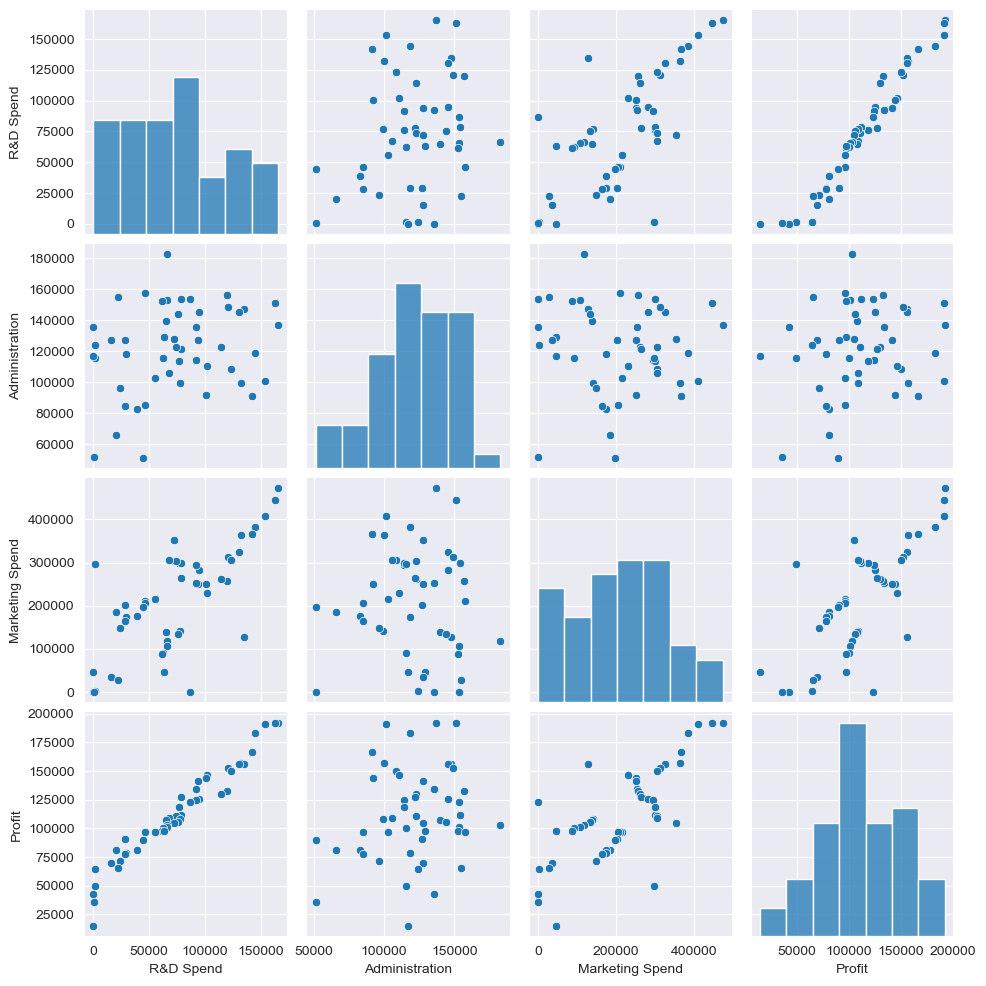

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [9]:
startup.rename(columns={'R&D Spend':'RSpend','Marketing Spend':'Marketing'}, inplace=True)
startup.head()

,RSpend,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
model = smf.ols('Profit~RSpend+Administration+Marketing',data=startup).fit()

model.summary()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        21:06:28   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RSpend             0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

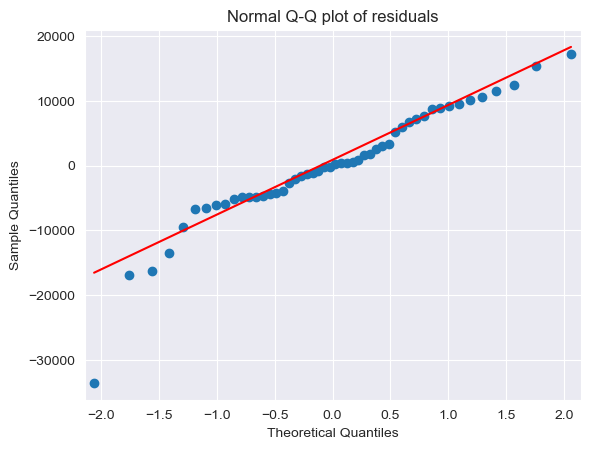

In [12]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [13]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

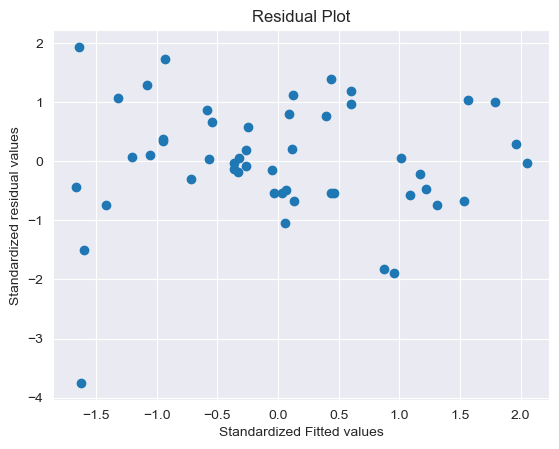

In [14]:
def get_std_vals( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_std_vals(model.fittedvalues),
            get_std_vals(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


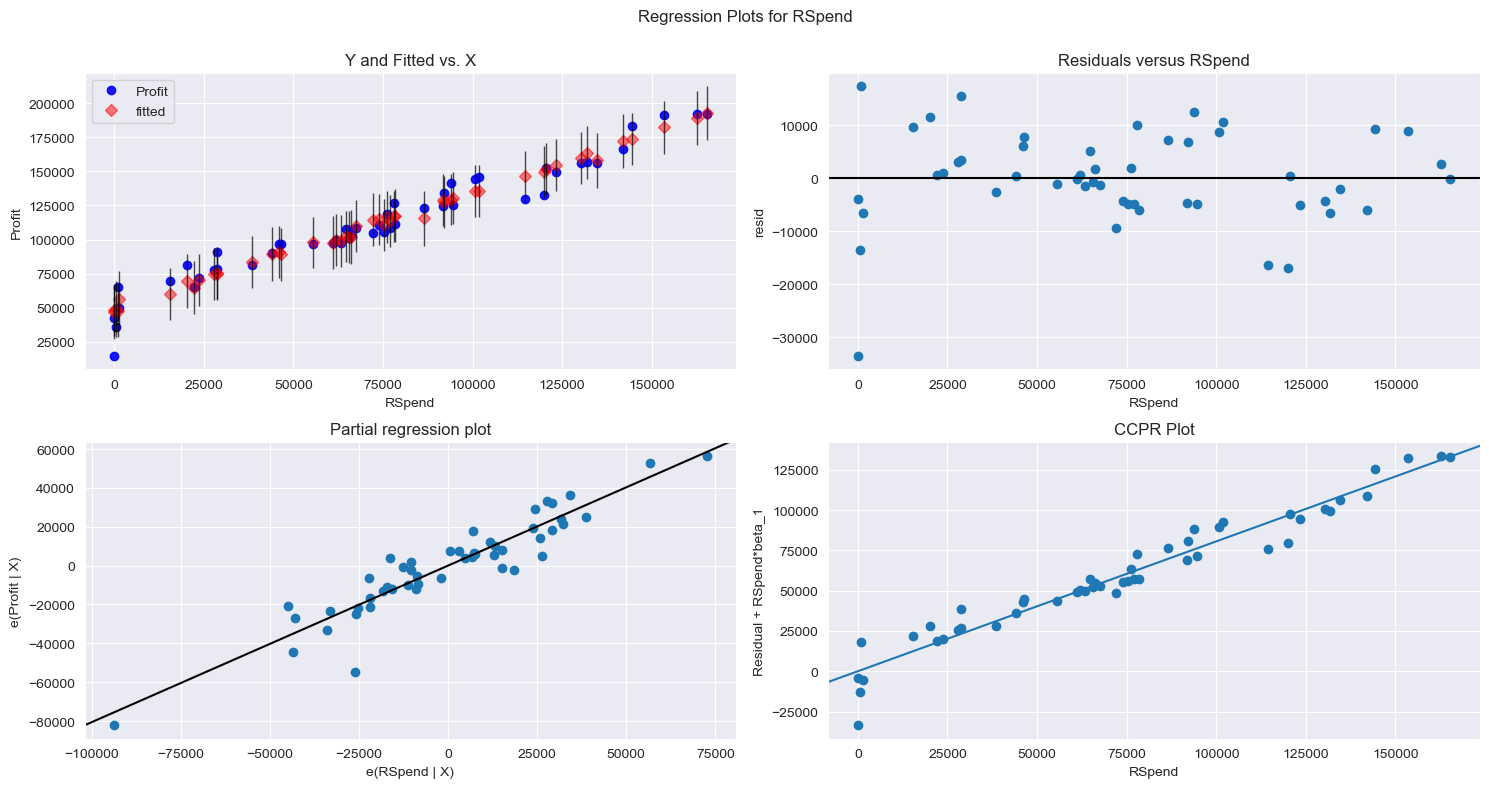

In [16]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RSpend", fig=fig)
plt.show()

eval_env: 1


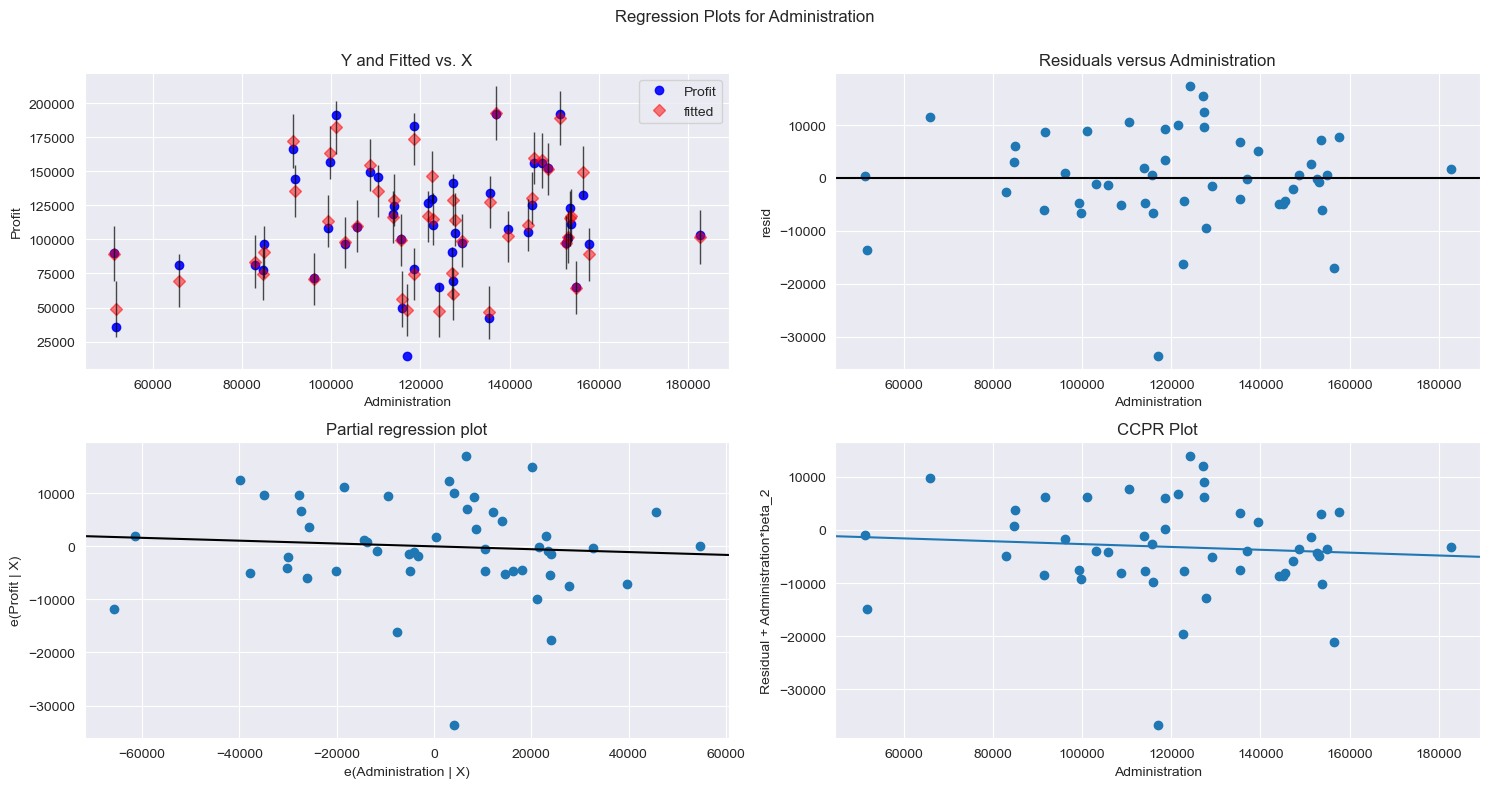

In [17]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


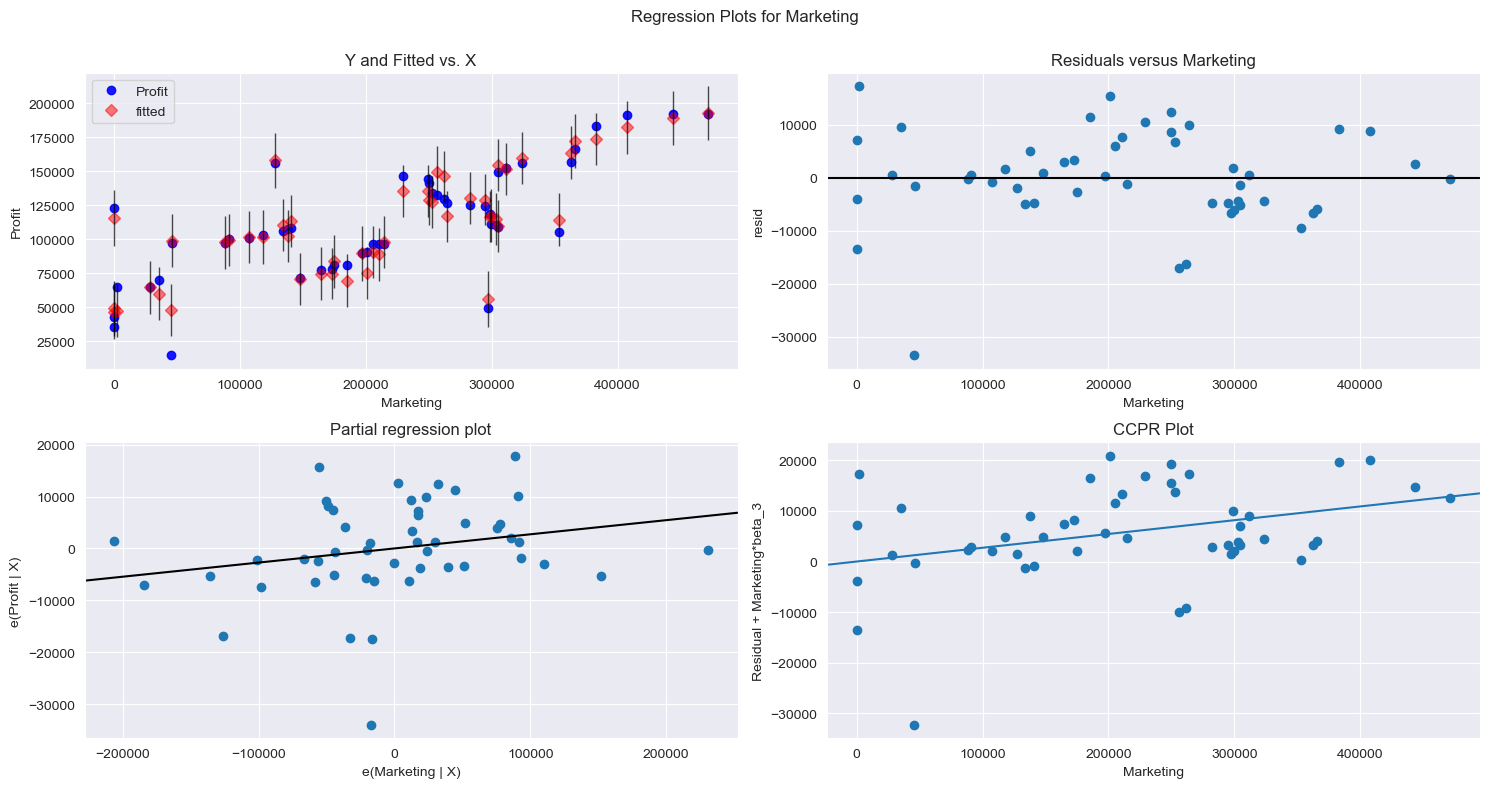

In [18]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

In [19]:
model_influence = model.get_influence()
(c,_ ) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

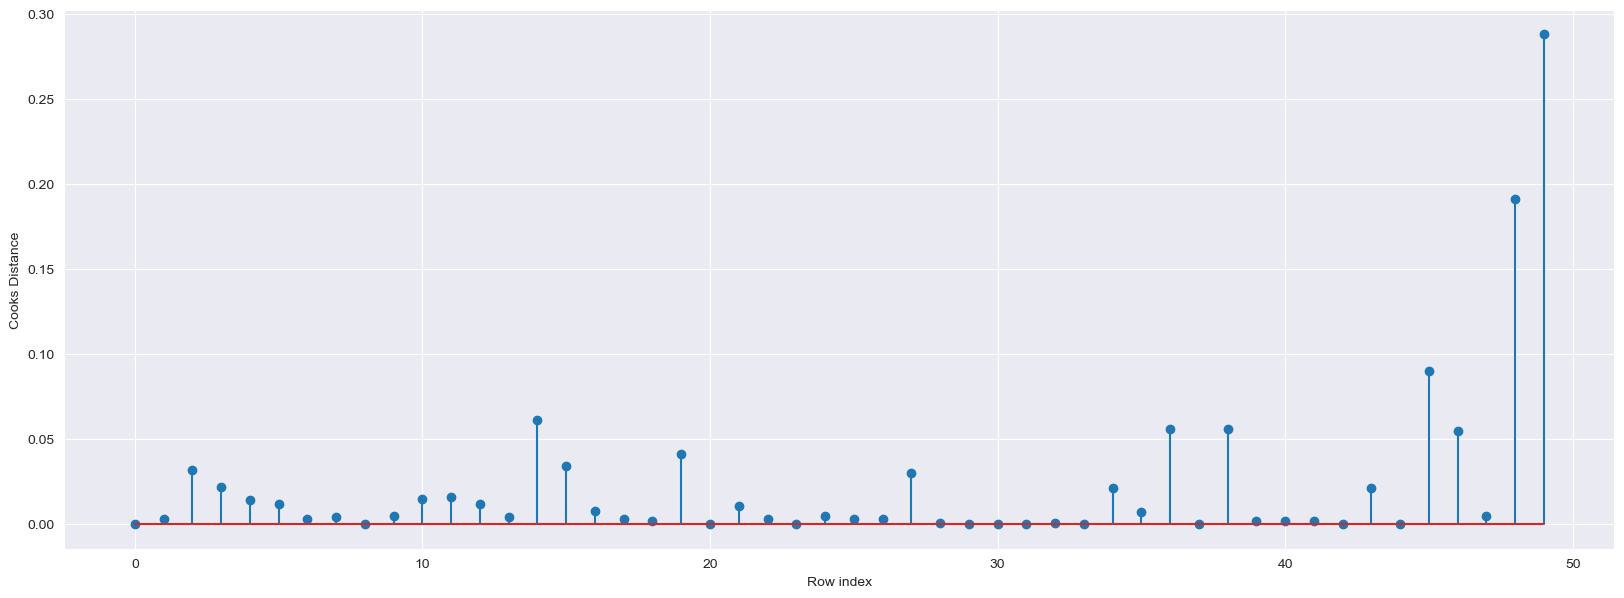

In [20]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [21]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

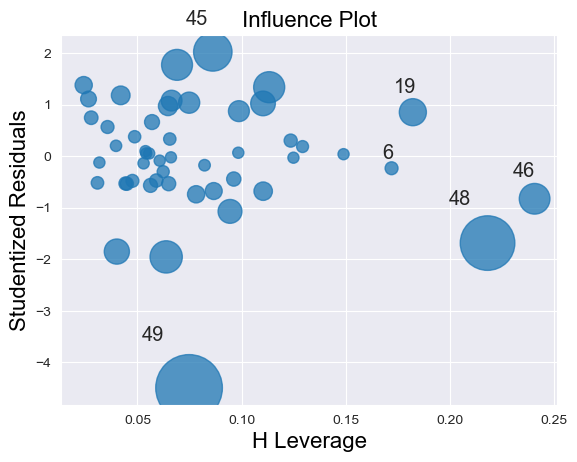

In [23]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [24]:
newdata=pd.DataFrame({'RSpend':124563.20,'Administration':756325.48,'Marketing':615896.78},index=[1])

In [25]:
newdata

,RSpend,Administration,Marketing
1,124563.2,756325.48,615896.78


In [26]:
model.predict(newdata)

1    146972.715164
dtype: float64

In [27]:
pred1 = model.predict(startup)

In [28]:
pred1

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [16]:
xsqrtmodel=smf.ols("Profit~np.sqrt(RSpend)+np.sqrt(Administration)+np.sqrt(Marketing)", data=startup).fit()

In [38]:
xsqrtmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     151.3
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           7.80e-24
Time:                        15:49:25   Log-Likelihood:                -541.02
No. Observations:                  50   AIC:                             1090.
Df Residuals:                      46   BIC:                             1098.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 2.65e+04    1.6e+04      1.659      0.104   -5661.877    5.87e+04
np.sqrt(RSpend)           349.3581     25.349     13.782      0.000     298.333     400.383
np.sqrt(Administration)   -22.6863     45.626     -0.497      0.621    -114.527      69.155
np.sqrt(Marketing)         13.7113     14.955      0.917      0.364     -16.391      43.814
==============================================================================
Omnibus:                        8.679   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.356
Skew:                           0.989   Prob(JB):                       0.0153
Kurtosis:                       3.312   Cond. No.                     5.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
ysqrtmodel=smf.ols("np.sqrt(Profit)~RSpend+Administration+Marketing", data=startup).fit()

In [18]:
ysqrtmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Profit)   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     131.3
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           1.47e-22
Time:                        19:34:39   Log-Likelihood:                -222.63
No. Observations:                  50   AIC:                             453.3
Df Residuals:                      46   BIC:                             460.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        226.8787     15.417     14.716      0.000     195.846     257.912
RSpend             0.0013      0.000     11.814      0.000       0.001       0.001
Administration  1.586e-06      0.000      0.013      0.989      -0.000       0.000
Marketing       4.338e-05   3.86e-05      1.124      0.267   -3.43e-05       0.000
==============================================================================
Omnibus:                       55.580   Durbin-Watson:                   0.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.045
Skew:                          -2.793   Prob(JB):                     9.87e-82
Kurtosis:                      15.160   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
xysqrtmodel=smf.ols("np.sqrt(Profit)~np.sqrt(RSpend)+np.sqrt(Administration)+np.sqrt(Marketing)", data=startup).fit()

In [20]:
xysqrtmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Profit)   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           1.22e-26
Time:                        19:35:40   Log-Likelihood:                -212.39
No. Observations:                  50   AIC:                             432.8
Df Residuals:                      46   BIC:                             440.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 188.0384     22.340      8.417      0.000     143.070     233.007
np.sqrt(RSpend)             0.5775      0.035     16.293      0.000       0.506       0.649
np.sqrt(Administration)    -0.0306      0.064     -0.480      0.634      -0.159       0.098
np.sqrt(Marketing)          0.0149      0.021      0.711      0.481      -0.027       0.057
==============================================================================
Omnibus:                       10.216   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               26.638
Skew:                           0.133   Prob(JB):                     1.64e-06
Kurtosis:                       6.566   Cond. No.                     5.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
ylogmodel=smf.ols("np.log(Profit)~RSpend+Administration+Marketing", data=startup).fit()

In [23]:
ylogmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Profit)   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     49.02
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           2.28e-14
Time:                        19:38:02   Log-Likelihood:                 3.9014
No. Observations:                  50   AIC:                            0.1972
Df Residuals:                      46   BIC:                             7.845
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.8383      0.166     65.249      0.000      10.504      11.173
RSpend          8.122e-06   1.14e-06      7.118      0.000    5.83e-06    1.04e-05
Administration  3.083e-07   1.29e-06      0.239      0.812   -2.29e-06     2.9e-06
Marketing       3.214e-07   4.16e-07      0.773      0.443   -5.15e-07    1.16e-06
==============================================================================
Omnibus:                       74.731   Durbin-Watson:                   0.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.557
Skew:                          -3.913   Prob(JB):                    4.26e-204
Kurtosis:                      22.705   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [47]:
X=startup.drop(['State','Profit'],axis= 1)

In [49]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [50]:
Y=startup['Profit']

In [51]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0)

In [53]:
skmodel = LinearRegression()

In [55]:
skmodel.fit(X_train,y_train)

LinearRegression()

In [57]:
predictions = skmodel.predict(X_test)

In [58]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  72767199.14073612
mean_absolute_error :  7025.635437378252


In [59]:
skmodel.score(X,Y)

0.9481440289303846

In [60]:
skmodel.coef_

array([0.78252121, 0.04497543, 0.03280294])

In [61]:
skmodel.intercept_

41081.801319404054

In [ ]:
#AS othermodel R2 values are less than first model, plots are not drawn